<a href="https://colab.research.google.com/github/rex17/Machine-Learning-Practice/blob/master/Housing_Price_EDA_Prepr_linearRegOneVar_MSE_0_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls 

sample_data


In [3]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

print("import success")

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


import success


In [4]:

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_description.txt to data_description.txt
Saving housingCol_analysis.txt to housingCol_analysis.txt
Saving ss_submission_1.csv to ss_submission_1.csv
Saving ss_submission_2_lm.csv to ss_submission_2_lm.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
User uploaded file "data_description.txt" with length 13370 bytes
User uploaded file "housingCol_analysis.txt" with length 214 bytes
User uploaded file "ss_submission_1.csv" with length 31939 bytes
User uploaded file "ss_submission_2_lm.csv" with length 26202 bytes
User uploaded file "test.csv" with length 451405 bytes
User uploaded file "train.csv" with length 460676 bytes


In [5]:
!ls

data_description.txt	 sample_data	      ss_submission_2_lm.csv  train.csv
housingCol_analysis.txt  ss_submission_1.csv  test.csv


In [0]:
# importing data
housing_df = pd.read_csv('train.csv')

In [7]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
housing_df.columnsw

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
#!cat data_description.txt

In [11]:
housing_df.shape

(1460, 81)

In [12]:
housing_df['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [13]:
housing_df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [14]:
housing_df['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [15]:
housing_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

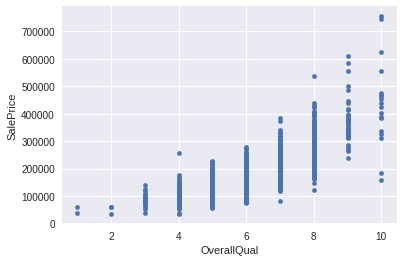

In [16]:
housing_df.plot(kind='scatter', x='OverallQual', y='SalePrice') ;
plt.show()

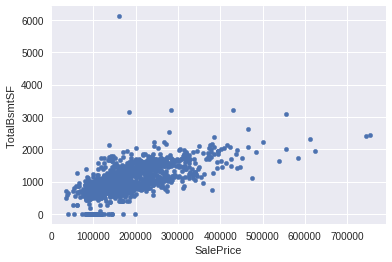

In [17]:
housing_df.plot(kind='scatter', x='SalePrice', y='TotalBsmtSF') ;
plt.show()

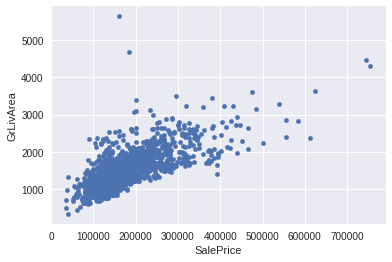

In [18]:
housing_df.plot(kind='scatter', x='SalePrice', y='GrLivArea') ;
plt.show()

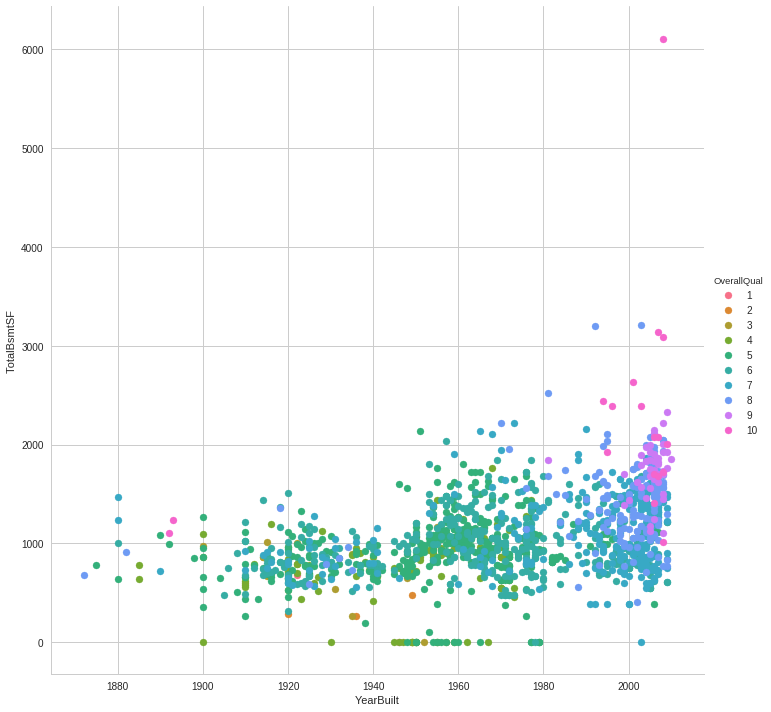

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(housing_df, hue="OverallQual", size=10) \
   .map(plt.scatter, "YearBuilt", "TotalBsmtSF") \
   .add_legend();
plt.show();


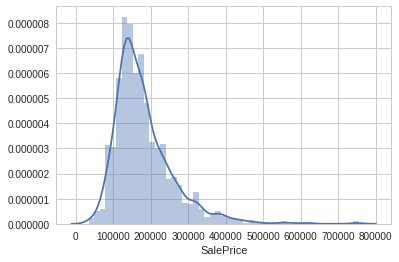

In [20]:
sns.distplot(housing_df['SalePrice']);

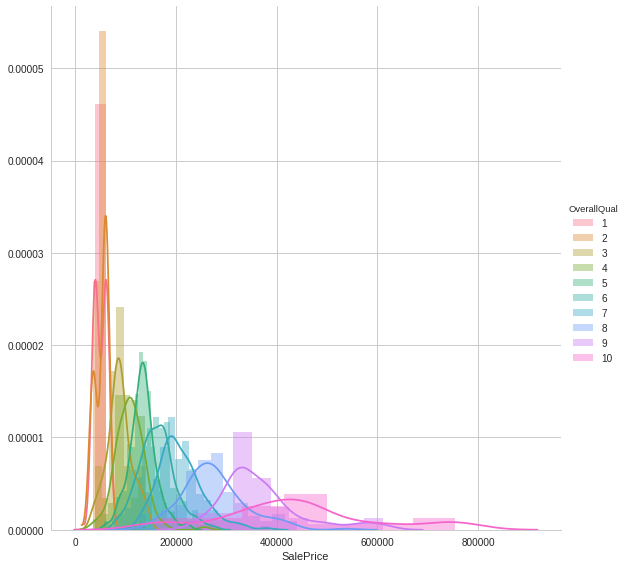

In [21]:
plt.close();
sns.FacetGrid(housing_df, hue="OverallQual", size=8)\
   .map(sns.distplot, "SalePrice") \
   .add_legend();
plt.show();



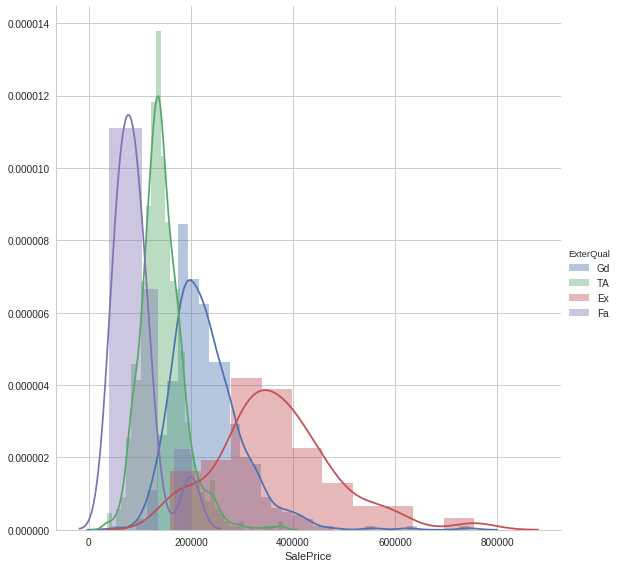

In [22]:
plt.close();
sns.FacetGrid(housing_df, hue="ExterQual", size=8)\
   .map(sns.distplot, "SalePrice") \
   .add_legend();
plt.show();

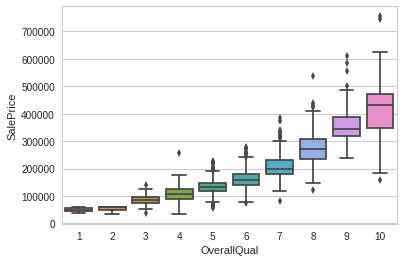

In [23]:
sns.boxplot(x='OverallQual',y='SalePrice', data=housing_df)
plt.show()

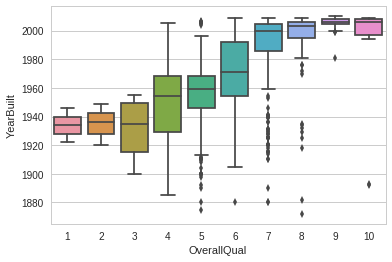

In [24]:
sns.boxplot(x='OverallQual',y='YearBuilt', data=housing_df)
plt.show()

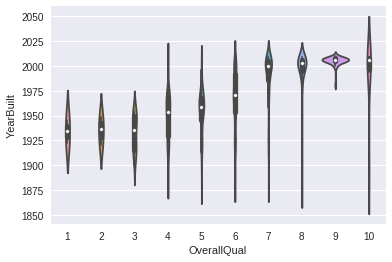

In [20]:
sns.violinplot(x="OverallQual", y="YearBuilt", data=housing_df)
plt.show()

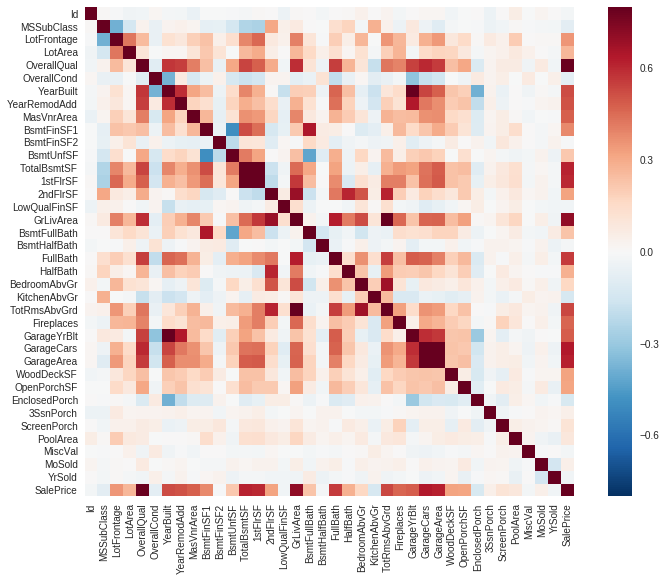

In [25]:
#correlation matrix to visualize the heatmap for relationship
corrmat = housing_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

TotalBsmtSF, 1stFlrSF

GarageYrBlt: Year garage was built, GarageCars , GarageArea

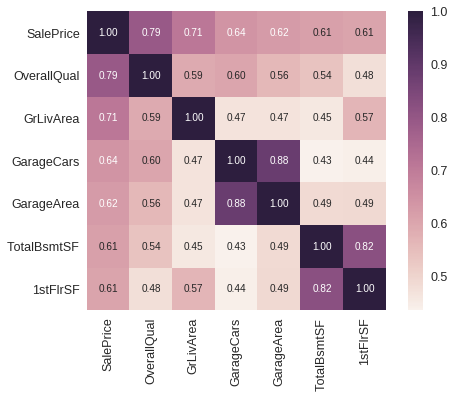

In [26]:
#saleprice correlation matrix
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

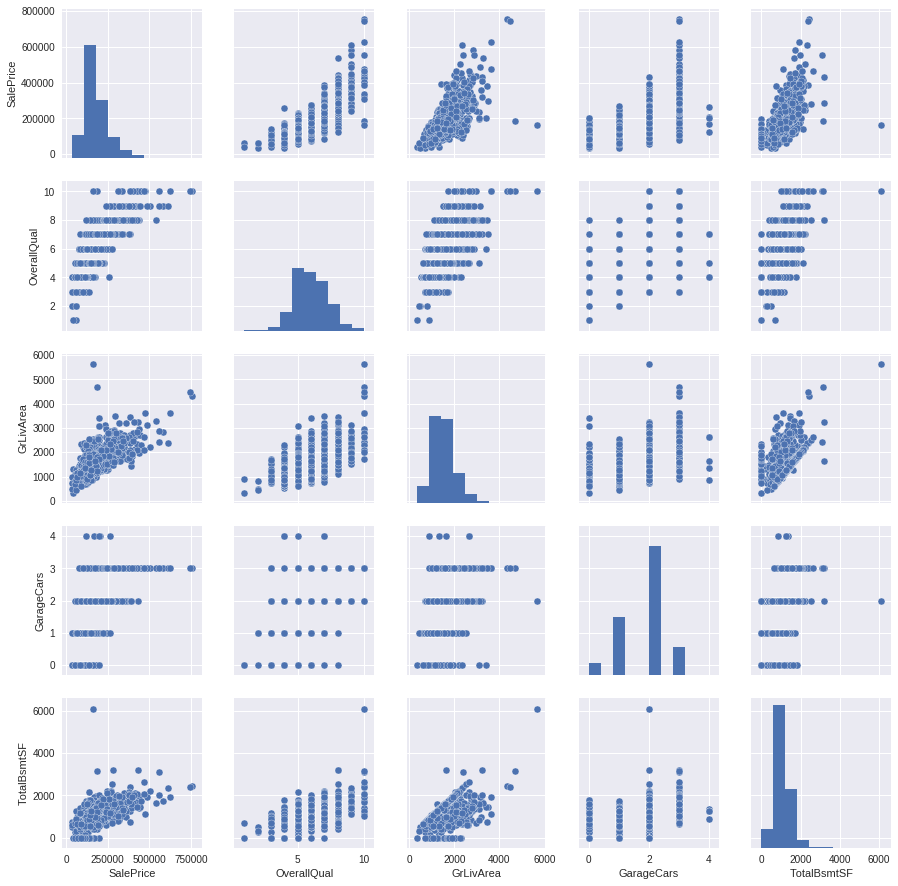

In [27]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(housing_df[cols], size = 2.5)
plt.show();

In [0]:
#missing data check

total = housing_df.isnull().sum().sort_values(ascending=False)

percent = (housing_df.isnull().sum()/housing_df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Row Count', 'Percent'])


In [29]:
missing_data.head()

,Row Count,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


In [0]:
missing_data_10 = missing_data.loc[missing_data['Percent'] >= 0.10]

In [33]:
missing_data_10.shape

(6, 2)

In [0]:
#dealing with missing data
housing_df_cleaned = housing_df.drop((missing_data[missing_data['Row Count'] > 1]).index,1)
housing_df_cleaned = housing_df_cleaned.drop(housing_df_cleaned.loc[housing_df_cleaned['Electrical'].isnull()].index)


In [38]:
housing_df_cleaned.shape

(1459, 63)

In [39]:
housing_df_cleaned.isnull().sum().max() # no ramaining null values

0

In [0]:
target = pd.DataFrame(housing_df.SalePrice, columns=["SalePrice"])

In [41]:
target.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


**Linear Regression Implementation with OverallQual variable**

In [45]:
X = housing_df["OverallQual"]
y = target["SalePrice"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.879e+04
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        11:59:33   Log-Likelihood:                -17955.
No. Observations:                1460   AIC:                         3.591e+04
Df Residuals:                    1459   BIC:                         3.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual  3.043e+04    222.032    137.068      0.000       3e+04    3.09e+04
==============================================================================
Omnibus:                      825.936   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10540.637
Skew:                           2.376   Prob(JB):                         0.00
Kurtosis:                      15.275   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
!ls

data_description.txt	 sample_data	      ss_submission_2_lm.csv  train.csv
housingCol_analysis.txt  ss_submission_1.csv  test.csv


In [0]:
# importing test data
test_df = pd.read_csv('test.csv')

In [0]:

predictions = model.predict(test_df["OverallQual"]) 


In [59]:
predictions.head()

0    152166.742755
1    182600.091305
2    152166.742755
3    182600.091305
4    243466.788407
dtype: float64

In [48]:
submission_df = pd.DataFrame(test_df['Id'],columns=['Id','SalePrice'])
submission_df["SalePrice"] = predictions
submission_df = submission_df[["Id","SalePrice"]]
submission_df.shape

(1459, 2)

In [92]:
submission_df.head()

,Id,SalePrice
0,1461,152166.742755
1,1462,182600.091305
2,1463,152166.742755
3,1464,182600.091305
4,1465,243466.788407


In [0]:
submission_df.to_csv("ss_submission_lmOv.csv", index = False)

In [54]:
!ls

data_description.txt	 sample_data	      ss_submission_2_lm.csv  test.csv
housingCol_analysis.txt  ss_submission_1.csv  ss_submission_lmOv.csv  train.csv


In [0]:
from google.colab import files
files.download('ss_submission_lmOv.csv') 

In [0]:
!rm ss_submission_lmOv_.csv

In [100]:
!ls

data_description.txt  ss_submission_1.csv  test.csv
sample_data	      ss_submission_2.csv  train.csv


In [0]:
housing_df_cleaned.to_csv("housing_df_cleaned.csv", index = False)